In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

Importing Dataset

In [ ]:
df=pd.read_csv('/content/water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


Data Explanation

ph: pH of 1. water (0 to 14).

Hardness: Capacity of water to precipitate soap in mg/L.

Solids: Total dissolved solids in ppm.

Chloramines: Amount of Chloramines in ppm.

Sulfate: Amount of Sulfates dissolved in mg/L.

Conductivity: Electrical conductivity of water in μS/cm.

Organic_carbon: Amount of organic carbon in ppm.

Trihalomethanes: Amount of Trihalomethanes in μg/L.

Turbidity: Measure of light emiting property of water in NTU.

Potability: Indicates if water is safe for human consumption.
Potable - 1 and Not potable - 0

Summary Statistics

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


In [ ]:
df.shape

(3276, 10)

In [ ]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [ ]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

Countplot for Potability

<ipython-input-206-181b638ad5b4>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




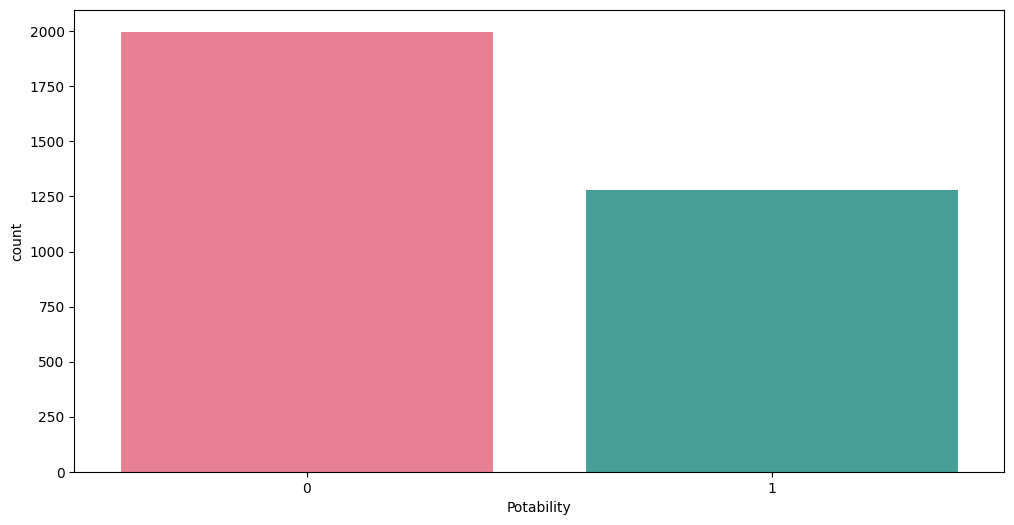

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x="Potability",data=df, palette='husl');

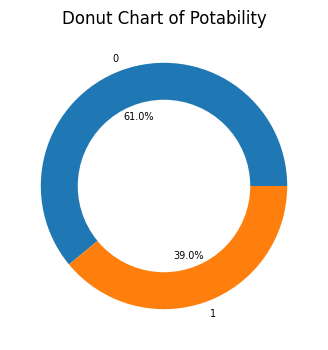

In [ ]:
label=df.Potability.value_counts().index
count=df.Potability.value_counts().values
plt.figure(1, figsize=(4,4))
plt.title("Potability Pie Chart",fontsize=10)
plt.pie(x=count,labels=label,textprops={'fontsize':7},autopct='%1.1f%%')

centre_circle=plt.Circle((0, 0), 0.70, fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Donut Chart of Potability')
plt.show()


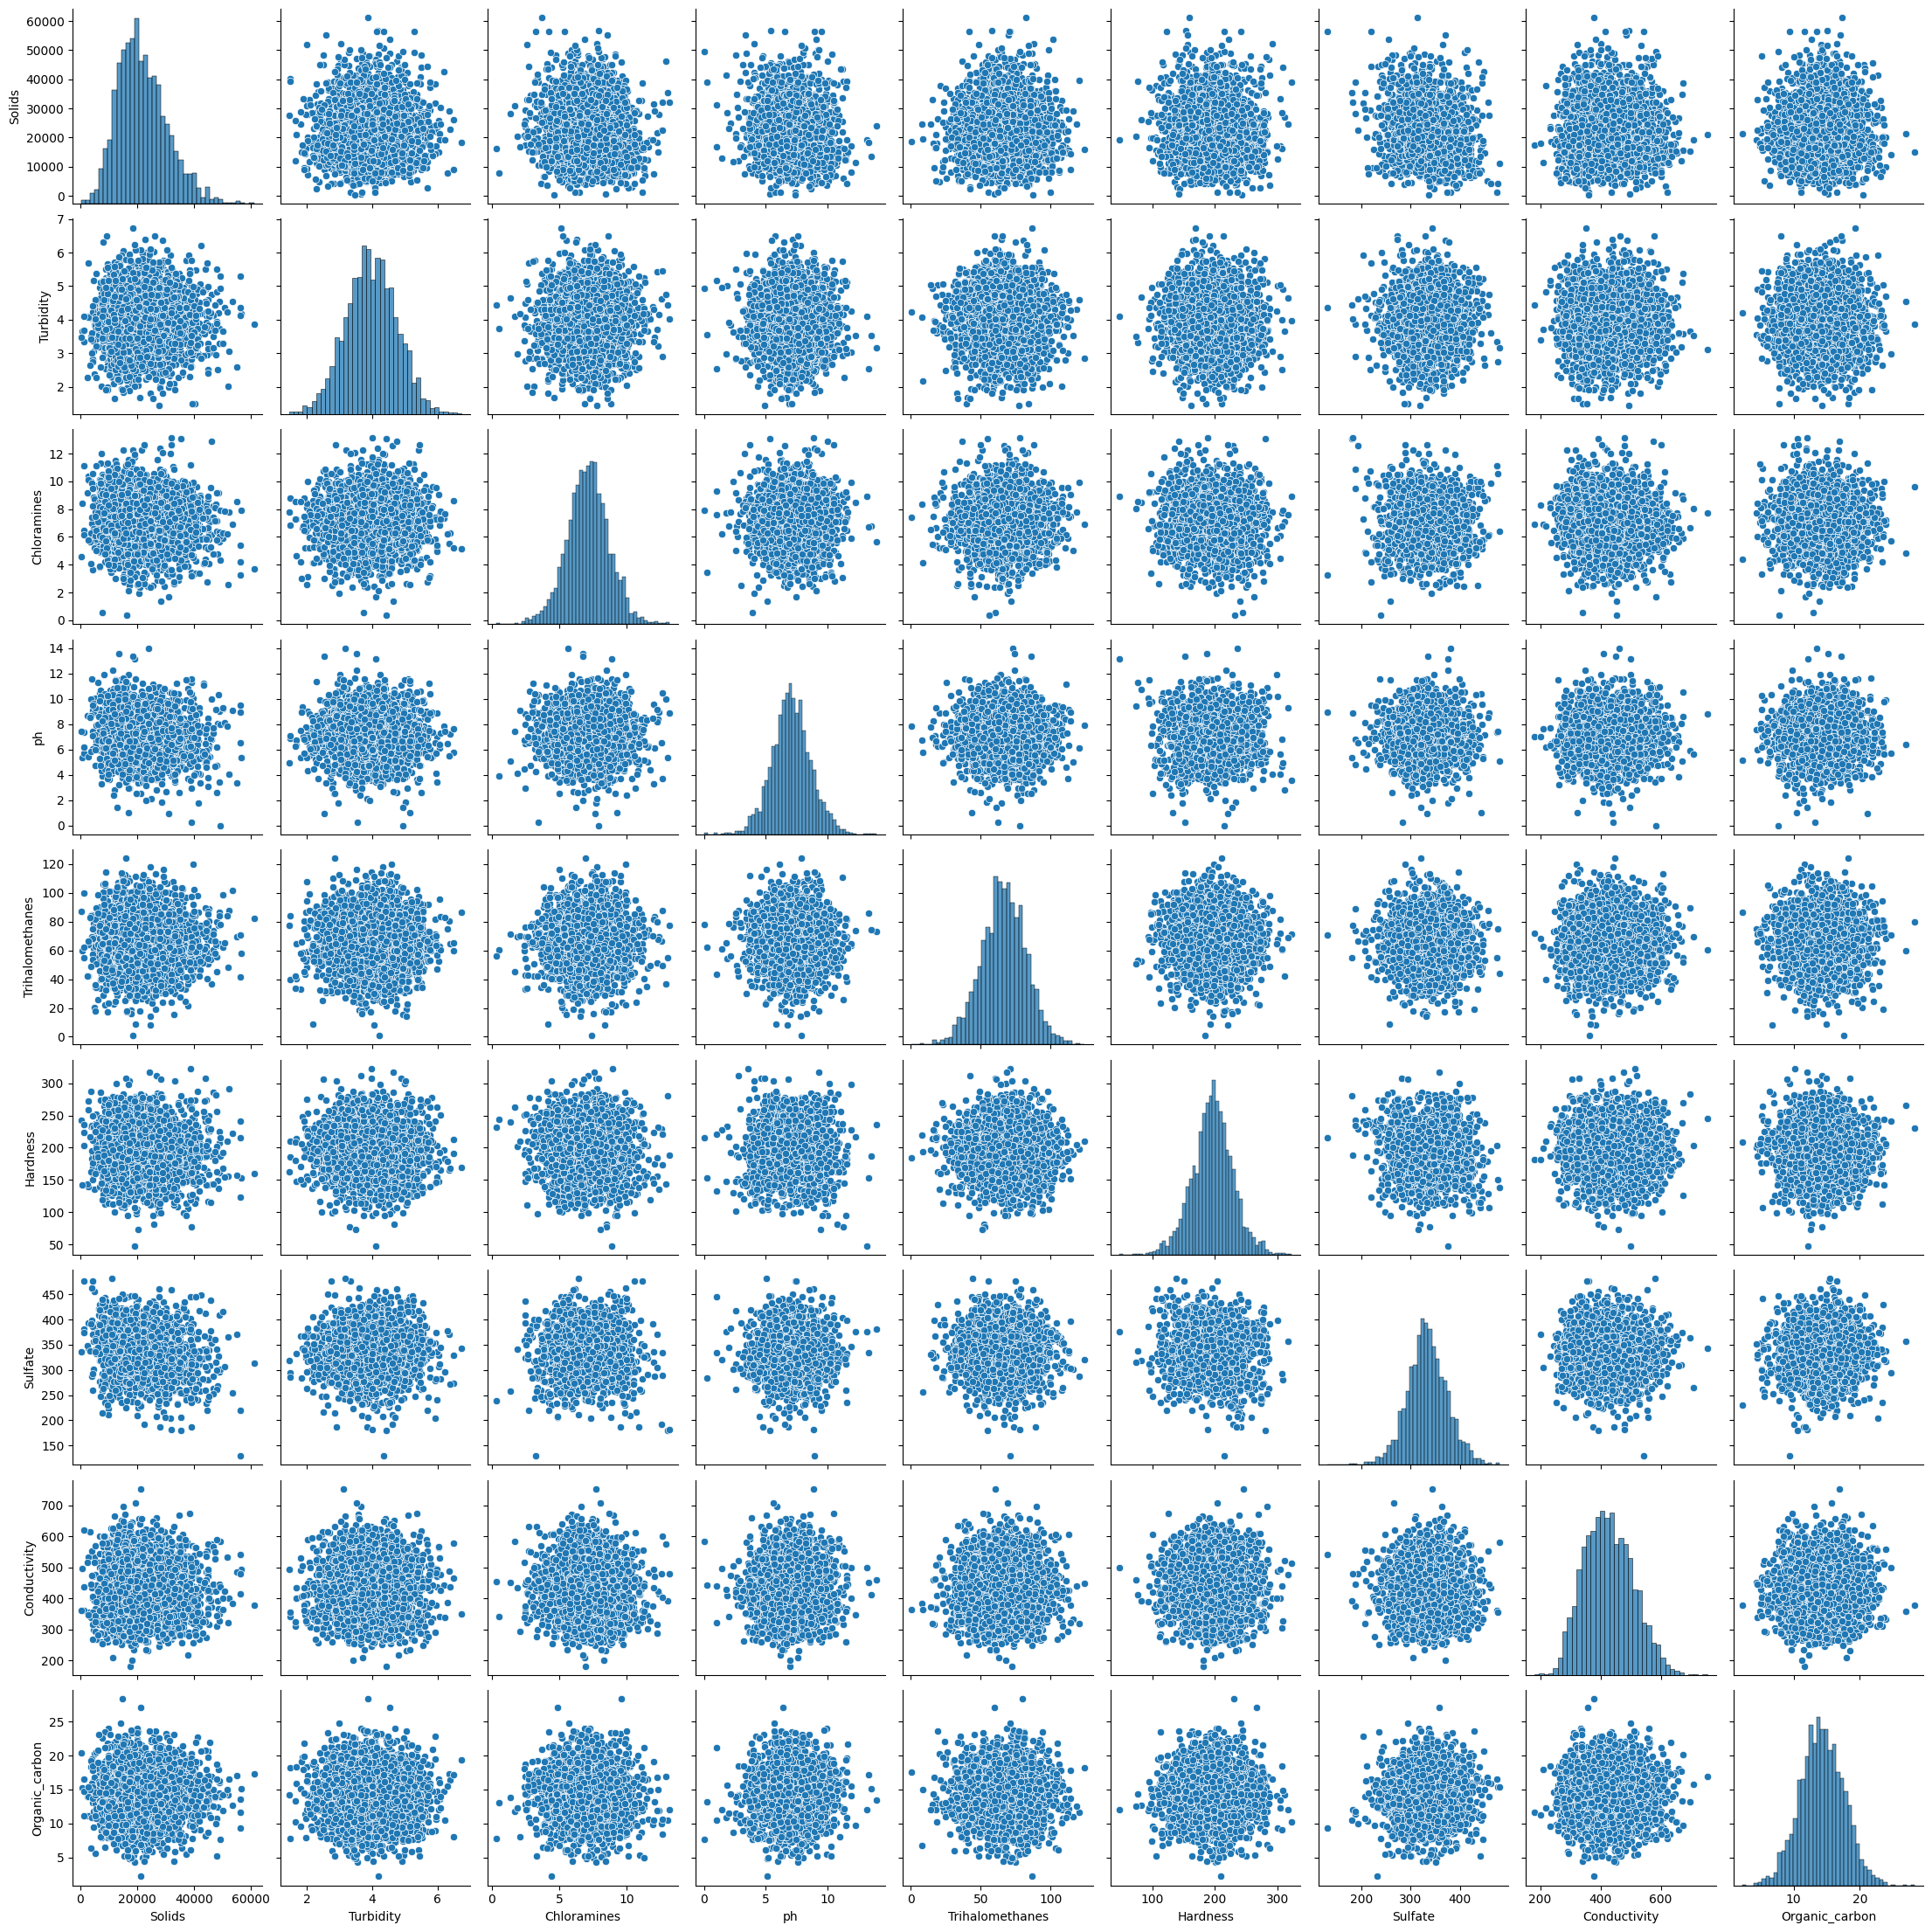

In [ ]:
cols=['Solids','Turbidity','Chloramines','ph','Trihalomethanes','Hardness','Sulfate','Conductivity','Organic_carbon']
sns.pairplot(df[cols])

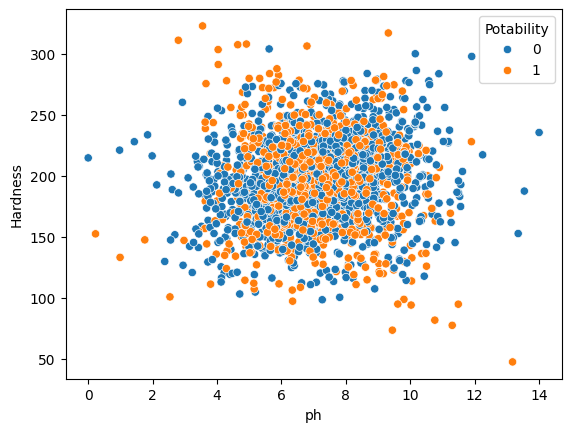

In [ ]:
sns.scatterplot(data=df,x='ph',y='Hardness',hue='Potability')
plt.show()

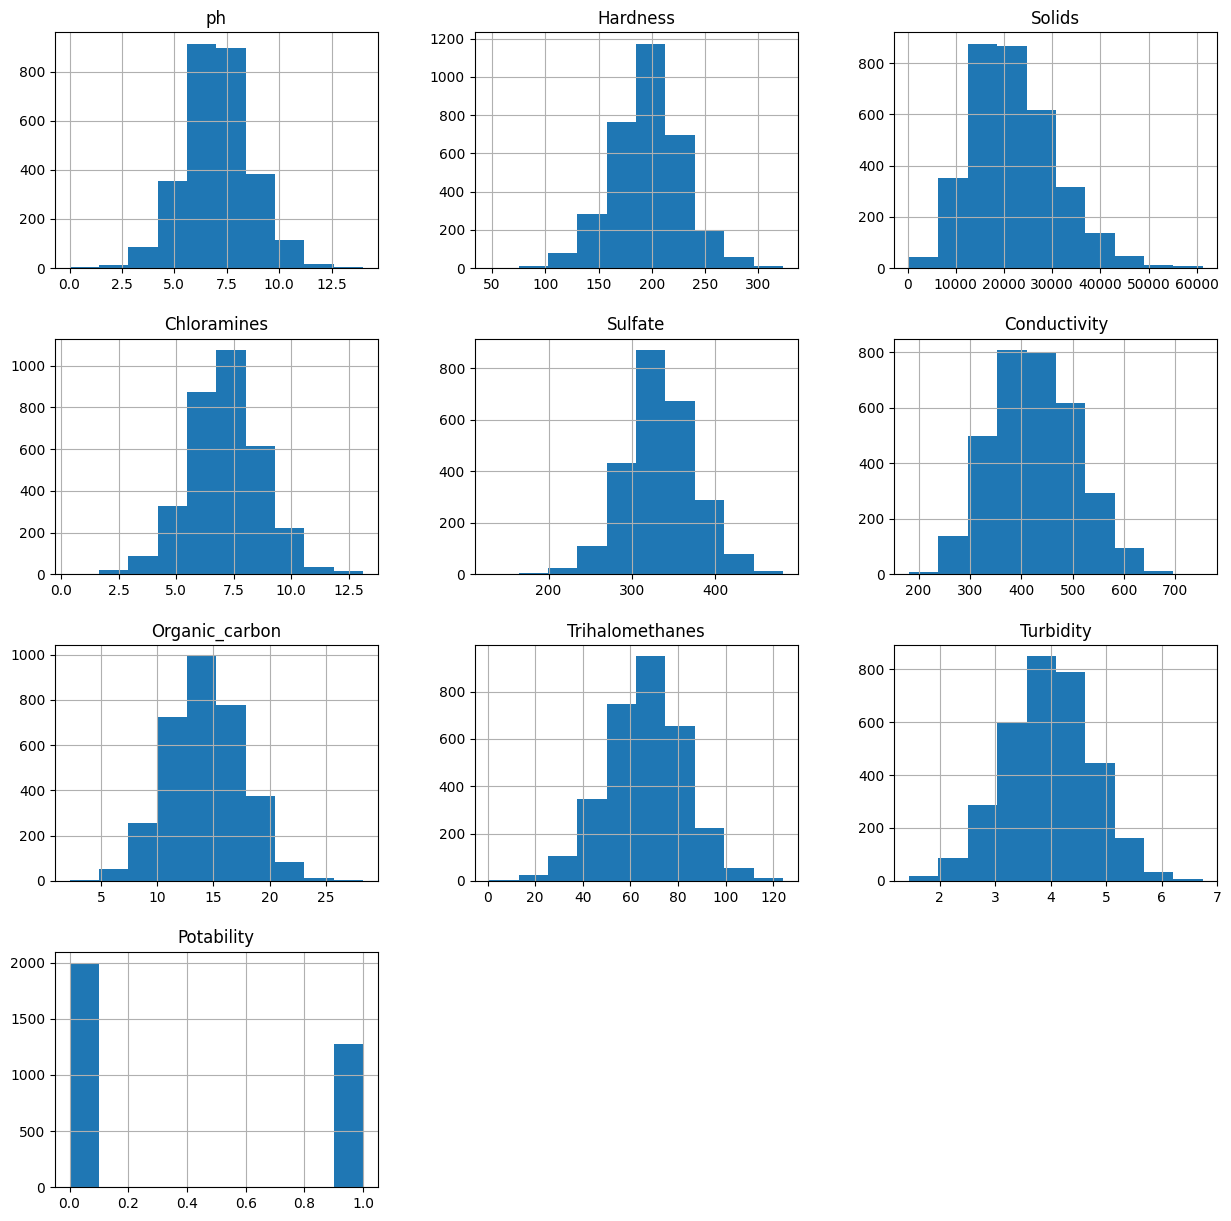

In [ ]:
df.hist(figsize=(15,15))
plt.show()

In [ ]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


In [ ]:
corr=df.corr()
corr["Potability"].sort_values(ascending=False)

Potability         1.000000
Solids             0.033743
Chloramines        0.023779
Trihalomethanes    0.007130
Turbidity          0.001581
ph                -0.003556
Conductivity      -0.008128
Hardness          -0.013837
Sulfate           -0.023577
Organic_carbon    -0.030001
Name: Potability, dtype: float64

<Axes: >

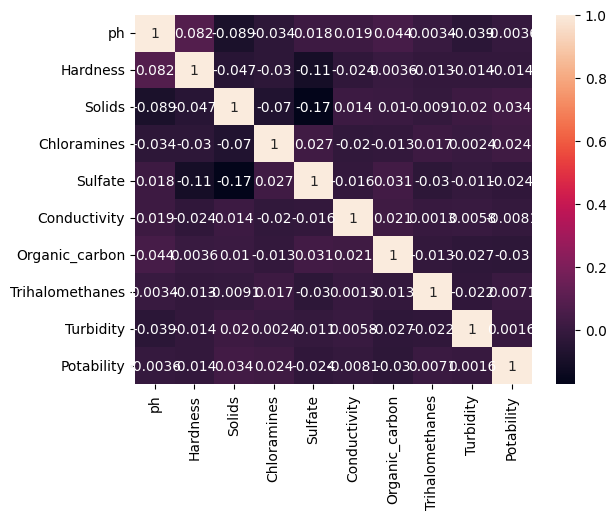

In [ ]:
sns.heatmap(df.corr(), annot=True)

Solids have the highest correlation.

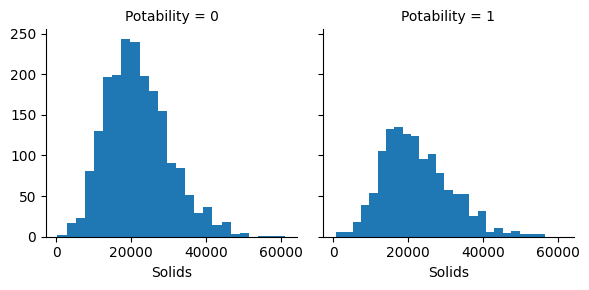

In [ ]:
g=sns.FacetGrid(df,col='Potability')
g.map(plt.hist,'Solids',bins=25)

Data Pre processing


In [ ]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
#Filling NaN pH Values
df["ph"].fillna(value = df["ph"].mean(),inplace=True)

In [ ]:
#Filling NaN Sulfate Values
df["Sulfate"].fillna(value = df["Sulfate"].mean(), inplace = True)

In [ ]:
#Filling NaN Trihalomethanes Values
df["Trihalomethanes"].fillna(value = df["Trihalomethanes"].mean(), inplace = True)

In [ ]:
#Checking any left NaN value
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
df.Potability.value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

Balancing Data

We need to balance the data to prevent bias.

Balancing using resampling techniques

In [ ]:
notpotable=df[df['Potability']==0]
potable=df[df['Potability']==1]

from sklearn.utils import resample
df_minority_upsampled=resample(potable,replace=True,n_samples=1200)

from sklearn.utils import shuffle
df=pd.concat([notpotable,df_minority_upsampled])
df=shuffle(df)

Train - Test Split & Normalization

In [ ]:
x=df.drop("Potability",axis = 1).values
x.ndim

2

In [ ]:
y=df["Potability"].values
y.ndim

1

In [ ]:
#Train - Test Split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size= 0.3,random_state=42)

print("x_train Shape : ",x_train.shape)
print("x_test Shape : ",x_test.shape)
print("y_train Shape : ",y_train.shape)
print("y_test Shape : ",y_test.shape)

x_train Shape :  (2293, 9)
x_test Shape :  (983, 9)
y_train Shape :  (2293,)
y_test Shape :  (983,)


Applying StandardScaler before fitting ML model to normalize the features.

In [ ]:
# Normalization
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
k_model=KNeighborsClassifier(n_neighbors=7)
g_model=GaussianNB()
s_model=SVC()
d_model=DecisionTreeClassifier(criterion='entropy')
r_model=RandomForestClassifier(n_estimators=100)
lst_model=[k_model,g_model,s_model,d_model,r_model]

In [ ]:
for i in lst_model:
  print("model name is",i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print("******************")
  print(confusion_matrix(y_test,y_pred))
  print("Accuracy score..........")
  print(accuracy_score(y_test,y_pred))

model name is KNeighborsClassifier(n_neighbors=7)
******************
[[487 130]
 [232 134]]
Accuracy score..........
0.6317395727365208
model name is GaussianNB()
******************
[[546  71]
 [290  76]]
Accuracy score..........
0.6327568667344863
model name is SVC()
******************
[[573  44]
 [257 109]]
Accuracy score..........
0.6937945066124109
model name is DecisionTreeClassifier(criterion='entropy')
******************
[[405 212]
 [191 175]]
Accuracy score..........
0.590030518819939
model name is RandomForestClassifier()
******************
[[544  73]
 [244 122]]
Accuracy score..........
0.6775178026449644


Hyper Parameter Tuning 


In [ ]:
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

sv= SVC()

para_knn = {'n_neighbors':np.arange(1,50)}  #parameters of knn
grid_knn = GridSearchCV(knn, param_grid=para_knn,cv=5) #search knn for 5 fold cross validation
para_sv={'C':[0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf']}
grid_sv=GridSearchCV(SVC(),para_sv,refit=True,verbose=3)

#Decision Tree
para_dt = {'criterion':['gini','entropy'],'max_depth':np.arange(1,50),'min_samples_leaf':[1,2,4,5,10,20,30,40,80,100]}
grid_dt = GridSearchCV(dt,param_grid=para_dt, cv=5) #grid search decision tree for 5 fold cv
params_rf = {'n_estimators':[100,200,350,500],'min_samples_leaf':[2,10,30]}
grid_rf = GridSearchCV(rf, param_grid=params_rf, cv=5)

In [ ]:
grid_knn.fit(x_train,y_train)
grid_sv.fit(x_train,y_train)
grid_dt.fit(x_train,y_train)
grid_rf.fit(x_train,y_train)


print("Best parameters for KNN:", grid_knn.best_params_)
print("Best parameters for SVC:",grid_sv.best_params_)
print("Best parameters for Decision Tree:", grid_dt.best_params_)
print("Best parameters for Random Forest:", grid_rf.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.623 total time=   0.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.623 total time=   0.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.623 total time=   0.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.622 total time=   0.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.622 total time=   0.2s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.623 total time=   0.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.623 total time=   0.2s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.623 total time=   0.2s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.622 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.622 total time=   0.2s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.623 total time=   0.2s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [ ]:
k_model_hyp=KNeighborsClassifier(n_neighbors=1)
s_model_hyp=SVC(C=1,gamma=1,kernel="rbf")
d_model_hyp=DecisionTreeClassifier(criterion='entropy',max_depth=48,min_samples_leaf=1)
r_model_hyp=RandomForestClassifier(min_samples_leaf=2,n_estimators=350)
lst_model_hyp=[k_model_hyp,s_model_hyp,d_model_hyp,r_model_hyp]

In [ ]:
for i in lst_model_hyp:
  print("model name is",i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print("******************")
  print(confusion_matrix(y_test,y_pred))
  print("Accuracy score..........")
  print(accuracy_score(y_test,y_pred))

model name is KNeighborsClassifier(n_neighbors=1)
******************
[[516  93]
 [ 61 290]]
Accuracy score..........
0.8395833333333333
model name is SVC(C=1, gamma=1)
******************
[[604   5]
 [ 93 258]]
Accuracy score..........
0.8979166666666667
model name is DecisionTreeClassifier(criterion='entropy', max_depth=48)
******************
[[498 111]
 [ 62 289]]
Accuracy score..........
0.8197916666666667
model name is RandomForestClassifier(min_samples_leaf=2, n_estimators=350)
******************
[[597  12]
 [ 78 273]]
Accuracy score..........
0.90625


In [ ]:
models = pd.DataFrame({'Model': ['Random Forest','Decision Tree', 'Support Vector Machines','K - Nearest Neighbors'],
    'Score After Tuning': [90.62,81.97,89.79,83.95], 'Score Before Tuning':[68.26,59.81,69.3,63.1]})
models.sort_values(by='Score After Tuning', ascending=False)

,Model,Score After Tuning,Score Before Tuning
0,Random Forest,90.62,68.26
2,Support Vector Machines,89.79,69.30
3,K - Nearest Neighbors,83.95,63.10
1,Decision Tree,81.97,59.81


Finally the best Model we can apply is RandomForest with accuracy 90.62%.

Displaying the result of the best ML Model

Random Forest Classifier

Text(0.5, 47.7222222222222, 'Predicted')

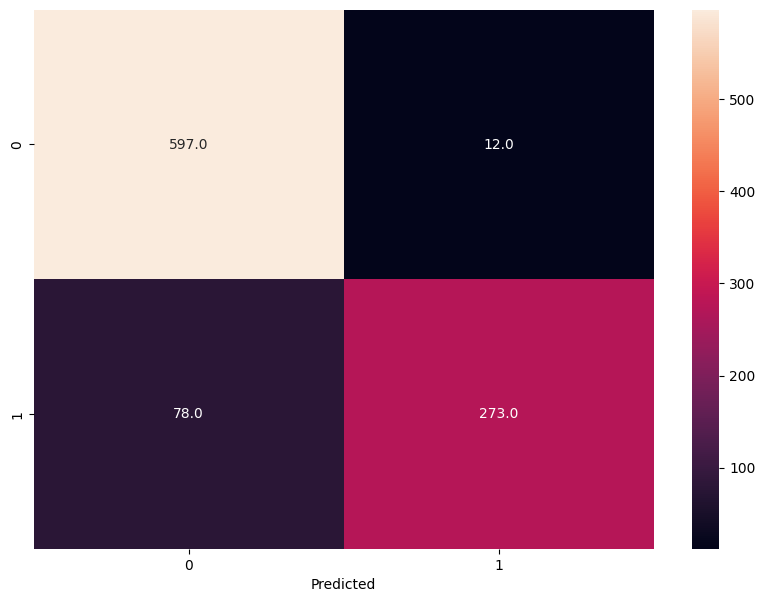

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = r_model_hyp.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt=".1f")
plt.xlabel('Predicted')

Classification report for the best ML Model

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.96      0.85       585
           1       0.89      0.55      0.68       375

    accuracy                           0.80       960
   macro avg       0.83      0.75      0.77       960
weighted avg       0.82      0.80      0.79       960



Finally the best Model we obtained is RandomForest with accuracy 90.62%

Before hyperparameter tuning, I was getting an accuracy score of mere 68.2% for Random Forest model but after parameter tuning, we obtained an accuracy of 90.62%. Hence parameter tuning is important to get a very high accuracy.